In [221]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')




In [222]:
# read in each year and change the name of the Data_Value column to the name of the year and what it represents
data_frames = []
for num in range(2013, 2019):
    df = pd.read_csv(f'../data/heart_dis_{num}.csv')
    df[f'{num}_mort_per_100k'] = df['Data_Value']
    if num != 2013:
        data_frames.append(df[[f'{num}_mort_per_100k', 
                               'LocationID', 'Stratification1', 'Stratification2', 'GeographicLevel']])
    else:
        data_frames.append(df)

In [223]:
# Remove data 
cleaned = []
for df in data_frames:
    temp = df[(df['Stratification1'] == 'Overall') 
              & (df['Stratification2'] == 'Overall') 
              & (df['GeographicLevel'] == 'County')]
    temp = temp.drop(columns=['Stratification1', 'Stratification2', 'GeographicLevel'])
    cleaned.append(temp)
    


In [225]:
# Merging all years on the key of 'LocationDesc'
data_set = pd.merge(cleaned[0], cleaned[1], on='LocationID', how='inner')
data_set = pd.merge(data_set, cleaned[2], on='LocationID', how='inner')
data_set = pd.merge(data_set, cleaned[3], on='LocationID', how='inner')
data_set = pd.merge(data_set, cleaned[4], on='LocationID', how='inner')
data_set = pd.merge(data_set, cleaned[5], on='LocationID', how='inner')

data_set.shape


(3219, 22)

In [228]:
data_set = data_set.dropna(subset=['2013_mort_per_100k', '2014_mort_per_100k', 
                        '2015_mort_per_100k', '2016_mort_per_100k',
                       '2017_mort_per_100k', '2018_mort_per_100k'])
data_set

,Year,LocationAbbr,LocationDesc,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,...,StratificationCategory2,TopicID,LocationID,Location,2013_mort_per_100k,2014_mort_per_100k,2015_mort_per_100k,2016_mort_per_100k,2017_mort_per_100k,2018_mort_per_100k
0,2013,AK,Aleutians East,NVSS,Cardiovascular Diseases,Heart Disease Mortality,147.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,2013,"(55.440626, -161.962562)",147.4,105.3,110.1,68.6,172.9,155.2
1,2013,AK,Aleutians West,NVSS,Cardiovascular Diseases,Heart Disease Mortality,229.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,2016,"(52.995403, -170.251538)",229.4,211.9,172.8,259.8,172.2,174.2
2,2013,AK,Anchorage,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,2020,"(61.159049, -149.103905)",255.5,257.9,259.3,252.1,243.3,249.3
3,2013,AK,Bethel,NVSS,Cardiovascular Diseases,Heart Disease Mortality,305.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,2050,"(60.924483, -159.749655)",305.5,351.6,319.2,345.7,337.1,349.8
5,2013,AK,Denali,NVSS,Cardiovascular Diseases,Heart Disease Mortality,281.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,2068,"(63.678399, -149.962076)",281.7,305.5,300.7,248.1,240.9,319.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,2013,WY,Niobrara County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,312.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,56027,"(43.059341, -104.481436)",312.1,328.5,354.3,310.9,272.8,266.5
3215,2013,WY,Park County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,273.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,56029,"(44.519924, -109.591865)",273.1,262.7,249.2,277.3,283.5,298.5
3216,2013,WY,Platte County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,309.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,56031,"(42.133959, -104.969399)",309.9,303.4,310.7,287.7,279.2,275.9
3217,2013,WY,Sheridan County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,350.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Race/Ethnicity,T2,56033,"(44.788996, -106.878597)",350.9,354.3,340.1,335.8,321.1,297.3


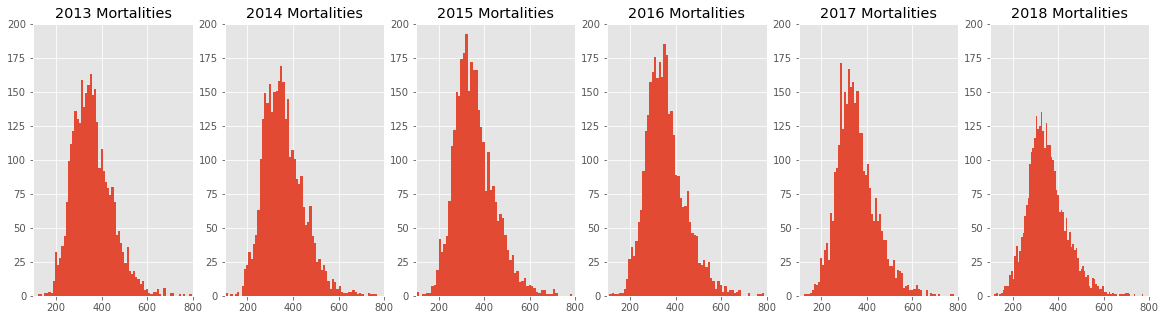

In [229]:
fig, axs = plt.subplots(1,6, figsize=(20,5))
for i in range(6):
    axs[i].hist(data_set[f'{2013+i}_mort_per_100k'], bins=100)
    axs[i].set_xlim(100,800)
    axs[i].set_ylim(0,200)
    axs[i].set_title(f'{2013+i} Mortalities');

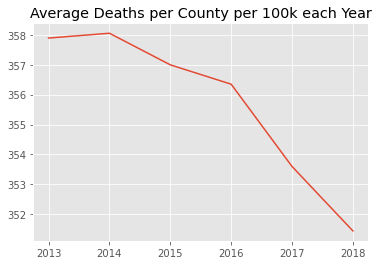

In [230]:
y = []
for i in range(6):
    y.append(data_set[f'{2013+i}_mort_per_100k'].mean())
x = [2013, 2014, 2015, 2016, 2017, 2018]
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Average Deaths per County per 100k each Year');


In [262]:
temperature

,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean,LocationDesc
0,AL-001,Autauga County,65.7,117,1.8,63.9,Autauga
1,AL-003,Baldwin County,68.7,122,1.9,66.8,Baldwin
2,AL-005,Barbour County,66.4,116,1.6,64.8,Barbour
3,AL-007,Bibb County,64.6,118,1.8,62.8,Bibb
4,AL-009,Blount County,63.3,123,2.7,60.6,Blount
...,...,...,...,...,...,...,...
3131,AK-240,Southeast Fairbanks Census Area,23.5,37,-0.2,23.7,Southeast Fairbanks Census Area
3132,AK-261,Valdez-Cordova Census Area,25.7,28,-0.4,26.1,Valdez-Cordova Census Area
3133,AK-275,Wrangell City and Borough,39.4,40,0.1,39.3,Wrangell City and Borough
3134,AK-282,Yakutat City and Borough,31.6,26,-0.4,32.0,Yakutat City and Borough


In [278]:
#Load in tempurature data and strip the word county from location column
temps = []
for i in range(2013, 2019):
    temperature = pd.read_csv(f'../data/temperature/{i}_temp.csv', sep=",", engine='python')
    temperature['LocationDesc'] = temperature['Location'].str.rstrip('County')
    temperature['LocationDesc'] = temperature['LocationDesc'].str.rstrip(' ')
    temperature['LocationAbbr'] = temperature['Location ID'].str[:2]
    temperature = temperature.rename(columns={"Value": f'{i}_average_temp'})
    temperature = temperature.drop(['Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'Location ID', 'Location'], axis=1)                            
    temps.append(temperature)


In [281]:
data_set
data_set['LocationDesc'] = data_set['LocationDesc'].str.rstrip('County')
data_set['LocationDesc'] = data_set['LocationDesc'].str.rstrip(' ')
for df in temps:
     data_set = pd.merge(data_set, df, on=['LocationDesc', 'LocationAbbr'], how='inner')
   

data_set

,Year,LocationAbbr,LocationDesc,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,...,2015_mort_per_100k,2016_mort_per_100k,2017_mort_per_100k,2018_mort_per_100k,2013_average_temp,2014_average_temp,2015_average_temp,2016_average_temp,2017_average_temp,2018_average_temp
0,2013,AL,Blount,NVSS,Cardiovascular Diseases,Heart Disease Mortality,385.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,434.8,437.1,437.9,435.0,63.3,59.3,60.5,62.4,64.6,62.0
1,2013,AL,Autauga,NVSS,Cardiovascular Diseases,Heart Disease Mortality,445.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,396.1,393.0,388.7,381.2,65.7,62.4,63.5,65.7,66.9,64.7
2,2013,AL,Baldwin,NVSS,Cardiovascular Diseases,Heart Disease Mortality,376.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,352.5,364.9,362.6,366.1,68.7,65.7,66.2,68.6,69.7,67.9
3,2013,AL,Barbour,NVSS,Cardiovascular Diseases,Heart Disease Mortality,476.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,422.7,445.0,444.3,547.6,66.4,63.4,64.3,66.4,67.7,66.0
4,2013,AL,Bibb,NVSS,Cardiovascular Diseases,Heart Disease Mortality,458.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,437.3,460.3,491.8,501.0,64.6,61.1,62.1,63.9,65.4,63.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,2013,WY,Niobrara,NVSS,Cardiovascular Diseases,Heart Disease Mortality,312.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,354.3,310.9,272.8,266.5,48.9,45.6,44.9,47.5,47.4,47.3
3100,2013,WY,Park,NVSS,Cardiovascular Diseases,Heart Disease Mortality,273.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,249.2,277.3,283.5,298.5,40.7,39.1,39.2,41.2,40.5,40.8
3101,2013,WY,Platte,NVSS,Cardiovascular Diseases,Heart Disease Mortality,309.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,310.7,287.7,279.2,275.9,49.8,46.4,46.4,48.5,48.2,48.5
3102,2013,WY,Sheridan,NVSS,Cardiovascular Diseases,Heart Disease Mortality,350.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,340.1,335.8,321.1,297.3,45.6,43.0,42.6,45.4,44.7,44.4


In [285]:
# Normalized data so it could be compared
data_set['2013_norm_deaths'] = (data_set['2013_mort_per_100k']-data_set['2013_mort_per_100k'].min())/(data_set['2013_mort_per_100k'].max()-data_set['2013_mort_per_100k'].min())
data_set['2013_norm_temp'] = (data_set['2013_average_temp']-data_set['2013_average_temp'].min())/(data_set['2013_average_temp'].max()-data_set['2013_average_temp'].min())


,Year,LocationAbbr,LocationDesc,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,...,2017_mort_per_100k,2018_mort_per_100k,2013_average_temp,2014_average_temp,2015_average_temp,2016_average_temp,2017_average_temp,2018_average_temp,2013_norm_deaths,2013_norm_temp
0,2013,AL,Blount,NVSS,Cardiovascular Diseases,Heart Disease Mortality,385.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,437.9,435.0,63.3,59.3,60.5,62.4,64.6,62.0,0.280378,0.665854
1,2013,AL,Autauga,NVSS,Cardiovascular Diseases,Heart Disease Mortality,445.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,388.7,381.2,65.7,62.4,63.5,65.7,66.9,64.7,0.342707,0.724390
2,2013,AL,Baldwin,NVSS,Cardiovascular Diseases,Heart Disease Mortality,376.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,362.6,366.1,68.7,65.7,66.2,68.6,69.7,67.9,0.270199,0.797561
3,2013,AL,Barbour,NVSS,Cardiovascular Diseases,Heart Disease Mortality,476.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,444.3,547.6,66.4,63.4,64.3,66.4,67.7,66.0,0.375761,0.741463
4,2013,AL,Bibb,NVSS,Cardiovascular Diseases,Heart Disease Mortality,458.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,491.8,501.0,64.6,61.1,62.1,63.9,65.4,63.2,0.357083,0.697561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,2013,WY,Niobrara,NVSS,Cardiovascular Diseases,Heart Disease Mortality,312.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,272.8,266.5,48.9,45.6,44.9,47.5,47.4,47.3,0.203043,0.314634
3100,2013,WY,Park,NVSS,Cardiovascular Diseases,Heart Disease Mortality,273.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,283.5,298.5,40.7,39.1,39.2,41.2,40.5,40.8,0.162120,0.114634
3101,2013,WY,Platte,NVSS,Cardiovascular Diseases,Heart Disease Mortality,309.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,279.2,275.9,49.8,46.4,46.4,48.5,48.2,48.5,0.200735,0.336585
3102,2013,WY,Sheridan,NVSS,Cardiovascular Diseases,Heart Disease Mortality,350.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,321.1,297.3,45.6,43.0,42.6,45.4,44.7,44.4,0.243757,0.234146


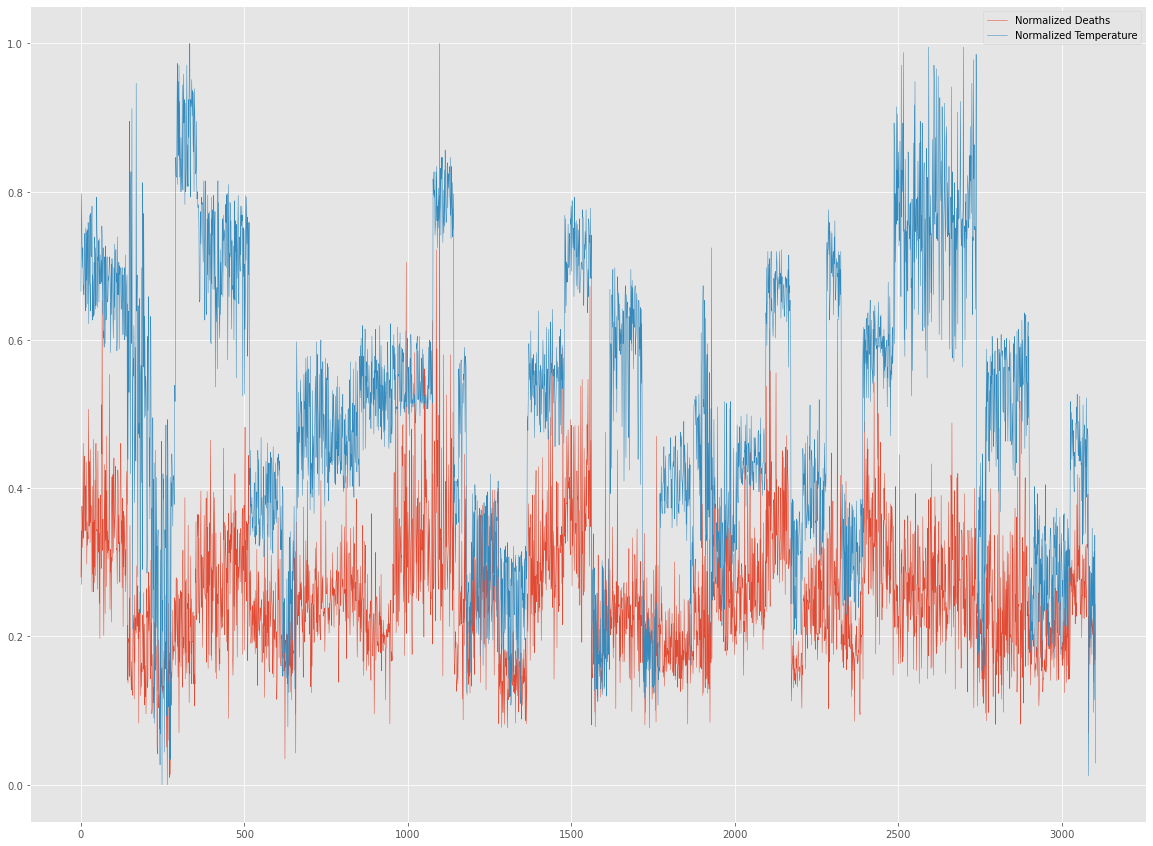

In [300]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(data_set['2013_norm_deaths'], label='Normalized Deaths', linewidth=.5)
ax.plot(data_set['2013_norm_temp'], label='Normalized Temperature', linewidth=.5)
ax.legend();
